## **Importação das bibliotecas e dados (AEP e Duas Unas)**

In [449]:
# %pip install ipykernel --break-system-packages
# %pip install scikit-learn --break-system-packages
# %pip install matplotlib --break-system-packages
# %pip install keras --break-system-packages
# %pip install tensorflow --break-system-packages
# %pip install pandas --break-system-packages
# %pip install plotly --break-system-packages
# %pip install seaborn --break-system-packages
# %pip install nbformat --break-system-packages
# %pip install keras --break-system-packages



In [450]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
base_path = './dataset/'

# carregando arquivo CSV
time_base = 'days'
duas_unas_dataset = f'{base_path}duas_unas/{time_base}/grouped_1_{time_base}.csv'
validation_interval = 97
time_step = 1  # Number of previous time steps to consider
output_steps = 7  # Number of future steps to predict

# transformando CSV em DataFrame
duas_unas_df = pd.read_csv(duas_unas_dataset)

duas_unas_validation = duas_unas_df.tail(validation_interval)

indices_to_validate = duas_unas_df.index[-validation_interval:].tolist()
duas_unas_df = duas_unas_df.drop(indices_to_validate).reset_index(drop=True)

duas_unas_df['timestamp'] = pd.to_datetime(duas_unas_df['timestamp'])
duas_unas_validation['timestamp'] = pd.to_datetime(duas_unas_validation['timestamp'])

duas_unas_df['index'] = range(len(duas_unas_df))
duas_unas_validation['index'] = indices_to_validate

duas_unas_df['kwh'] = duas_unas_df['kWh fornecido']
duas_unas_validation['kwh'] = duas_unas_validation['kWh fornecido']

duas_unas_df.drop(columns=['timestamp'], inplace=True)
duas_unas_validation.drop(columns=['timestamp'], inplace=True)

duas_unas_df.drop(columns=['kWh fornecido'], inplace=True)
duas_unas_validation.drop(columns=['kWh fornecido'], inplace=True)

X = duas_unas_df['index'].values.reshape(-1,1)
y = duas_unas_df['kwh'].values
X_validation = duas_unas_validation['index'].values.reshape(-1,1)
y_validation = duas_unas_validation['kwh'].values
print(X_validation)

[[214]
 [215]
 [216]
 [217]
 [218]
 [219]
 [220]
 [221]
 [222]
 [223]
 [224]
 [225]
 [226]
 [227]
 [228]
 [229]
 [230]
 [231]
 [232]
 [233]
 [234]
 [235]
 [236]
 [237]
 [238]
 [239]
 [240]
 [241]
 [242]
 [243]
 [244]
 [245]
 [246]
 [247]
 [248]
 [249]
 [250]
 [251]
 [252]
 [253]
 [254]
 [255]
 [256]
 [257]
 [258]
 [259]
 [260]
 [261]
 [262]
 [263]
 [264]
 [265]
 [266]
 [267]
 [268]
 [269]
 [270]
 [271]
 [272]
 [273]
 [274]
 [275]
 [276]
 [277]
 [278]
 [279]
 [280]
 [281]
 [282]
 [283]
 [284]
 [285]
 [286]
 [287]
 [288]
 [289]
 [290]
 [291]
 [292]
 [293]
 [294]
 [295]
 [296]
 [297]
 [298]
 [299]
 [300]
 [301]
 [302]
 [303]
 [304]
 [305]
 [306]
 [307]
 [308]
 [309]
 [310]]


In [451]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# regr = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=200).fit(X_train, y_train)

# y_pred = regr.predict(X_test)

# from sklearn.metrics import mean_squared_error

# rms = mean_squared_error(y_test, y_pred, squared=False)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_test, y_test, color="blue", label="Valores Reais")
# plt.scatter(X_test, y_pred, color="red", label="Previsões", alpha=0.6)
# plt.title(f"Teste do MLPRegressor (RMSE: {rms:.2f})")
# plt.xlabel("Horas (X)")
# plt.ylabel("Previsão (y)")
# plt.legend()
# plt.show()

In [452]:
# print(X_validation)
# y_pred_validation = regr.predict(X_validation)

# plt.figure(figsize=(8, 6))
# plt.scatter(X_validation, y_validation, color="blue", label="Valores Reais")
# plt.scatter(X_validation, y_pred_validation, color="red", label="Previsões", alpha=0.6)
# plt.title(f"Hora da Verdade")
# plt.xlabel("Hora (X)")
# plt.ylabel("Consumo (y)")
# plt.legend()
# plt.show()

In [453]:
# pirapama_dataset = f'{base_path}outras_unidades/pirapama/agrupado_hora_Pirapama_2021.csv'
# # transformando CSV em DataFrame
# pirapama_df = pd.read_csv(pirapama_dataset)

# pirapama_df['Data'] = pd.to_datetime(pirapama_df['Data'])

# pirapama_df['index'] = range(len(pirapama_df))

# pirapama_df['kwh'] = pirapama_df['kWh fornecido'] 

# pirapama_df.drop(columns=['Data'], inplace=True)

# pirapama_df.drop(columns=['kWh fornecido'], inplace=True)

# X_pirapama = pirapama_df['index'].values.reshape(-1,1)
# y_pirapama = pirapama_df['kwh'].values

# y_pred = regr.predict(X_pirapama)

# plt.figure(figsize=(8, 6))
# plt.plot(X_pirapama, y_pirapama, color="blue", label="Valores Reais")
# plt.plot(X_pirapama, y_pred, color="red", label="Valores Previstos")
# plt.title(f"Hora da Verdade")
# plt.xlabel("Hora (X)")
# plt.ylabel("Consumo (y)")
# plt.legend()
# plt.show()

In [454]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_kwh = scaler.fit_transform(duas_unas_df['kwh'].values.reshape(-1, 1))

scaled_kwh_validation = scaler.fit_transform(duas_unas_validation['kwh'].values.reshape(-1,1))

def create_dataset(data, time_step=1, output_steps=1):
    X, y = [], []
    for i in range(len(data) - time_step - output_steps + 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[(i + time_step):(i + time_step + output_steps), 0])
    return np.array(X), np.array(y)

# Create the dataset
X, y = create_dataset(scaled_kwh, time_step, output_steps)

X_validation, y_validation = create_dataset(scaled_kwh_validation, time_step, output_steps)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_steps)) 
model.compile(optimizer='adam', loss='mean_squared_error')

callback = EarlyStopping(monitor='val_loss', min_delta=0.002, patience=5, verbose=0, mode='auto')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, callbacks=[callback])

Epoch 1/50


/home/joaotinoco/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8961
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8437 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7627 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6444 
Epoch 5/50
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.5687

/home/joaotinoco/.local/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4983 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2931 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1059 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0391 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0377 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0280 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0289 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246 
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248
Epoch 16/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 
Epoch 17/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0339 
Epoch 18/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 
Epoch 19/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0272 
Epoch 20/50
1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
90 90 1


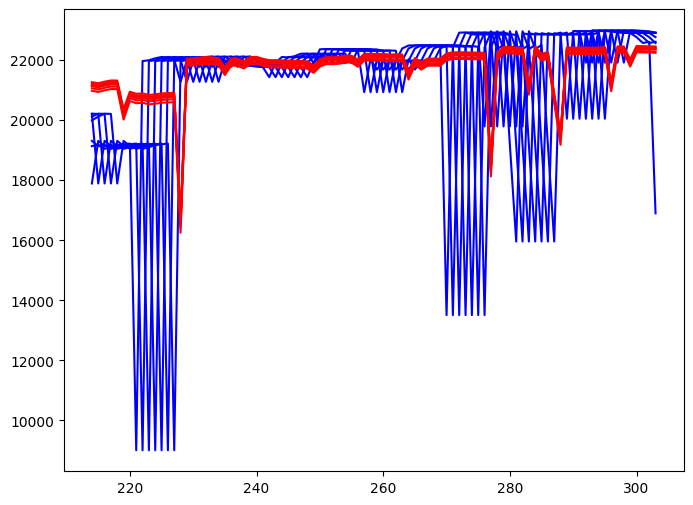

7 7


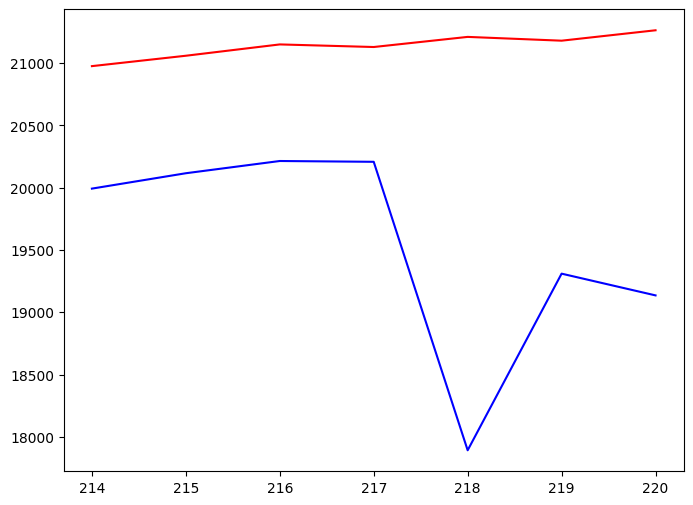

In [455]:
y_pred = model.predict(X_validation)
print(len(X_validation), len(y_pred), len(X_validation[0]))
y_pred_rescaled = scaler.inverse_transform(y_pred)

y_test_rescaled = scaler.inverse_transform(y_validation)
indices_to_validate = indices_to_validate[:len(y_pred_rescaled)]

plt.figure(figsize=(8,6))
plt.plot(indices_to_validate, y_test_rescaled, label="Original", color='blue')
plt.plot(indices_to_validate, y_pred_rescaled, label="Predição", color='red')
plt.show()

plt.figure(figsize=(8,6))
print(len(indices_to_validate[0:output_steps]), len(y_test_rescaled[0]))
plt.plot(indices_to_validate[0:output_steps], y_test_rescaled[0], label="Original", color='blue')
plt.plot(indices_to_validate[0:output_steps], y_pred_rescaled[0], label="Predição", color='red')
plt.show()